In [2]:
# import sys, datetime
import serial.tools.list_ports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import signal
import time, os
from datetime import datetime

In [3]:
ports = serial.tools.list_ports.comports()
port = None
# print(ports)
for port in ports:
    # print(f"{port}")
    print(f"Порт: {port.device}")
    # print(f"Описание: {port.description}")
    # print(f"VID:PID: {port.vid}:{port.pid}")

if port:
    port = port.device

Порт: COM5


In [4]:
time.sleep(5)
with (serial.Serial(port, baudrate=921600, bytesize=8, stopbits=1, timeout=11)) as serialData:
    # Read data from COM port
    command = 'R'

    # Send the command to the DataPort
    serialData.write(command.encode(encoding="utf-8"))
    # serialData.flush()
time.sleep(11)

In [5]:
rawdata = None

with (serial.Serial(port, baudrate=921600, bytesize=8, stopbits=1, timeout=47)) as serialData:
    # Read data from COM port
    command = 'S'

    # Send the command to the DataPort
    serialData.write(command.encode())
    
    # Get data
    rawdata = serialData.read(4194305)

In [6]:
data = []
for num in range(0, 2097152, 2):
    hi_byte = rawdata[num]
    hi_byte = hi_byte if hi_byte < 128 else hi_byte-256
    lo_byte = rawdata[num+1]    
    data.append(hi_byte*256+lo_byte)

encoder = []
for num in range(2097152, len(rawdata)-1, 2):
    hi_byte = rawdata[num]
    hi_byte = hi_byte if hi_byte < 128 else hi_byte-256
    lo_byte = rawdata[num+1]    
    encoder.append(hi_byte*256+lo_byte)
df = pd.DataFrame({'encoder' : encoder, 'data' : data})

In [ ]:
try:
    os.mkdir('data')
except FileExistsError:
    pass
except Exception as e:
    print(f'Что-то пошло не так: {e}')

filename = f"raw_data_{datetime.now().strftime('%Y-%m-%d_%H-%M-%S')}.csv"
dir = 'data'

df.to_csv(os.path.join(dir, filename))

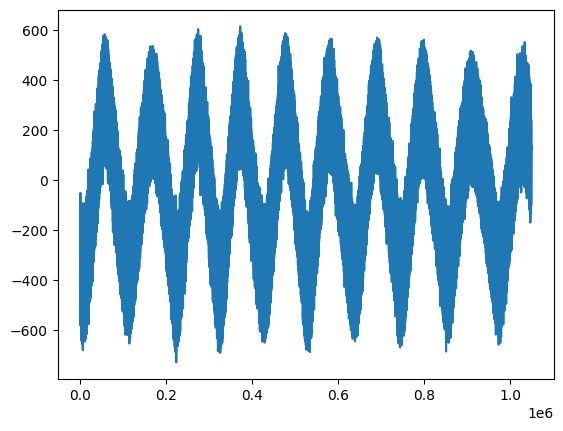

In [11]:
plt.plot(df.data)